In [277]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline 

In [278]:
kernel_size = 3
image_size = 9

In [279]:
model0 = Sequential()
model0.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=1,
                  input_shape=(image_size, image_size, 1)))

In [280]:
model0_weights = model0.get_weights()
print(model0_weights)

[array([[[[ 0.14538425]],

        [[-0.02323592]],

        [[-0.5219749 ]]],


       [[[-0.26252487]],

        [[-0.35874075]],

        [[ 0.23541147]]],


       [[[ 0.19073284]],

        [[ 0.01886463]],

        [[-0.43963027]]]], dtype=float32), array([0.], dtype=float32)]


In [281]:
layer_num = 0
filter_num = 0
y = 0
for x in range(kernel_size):
    model0_weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        model0_weights[layer_num][y][x][0][filter_num] = -1
print(model0_weights)

[array([[[[ 1.]],

        [[ 1.]],

        [[ 1.]]],


       [[[-1.]],

        [[-1.]],

        [[-1.]]],


       [[[-1.]],

        [[-1.]],

        [[-1.]]]], dtype=float32), array([0.], dtype=float32)]


And save those weights back into the model.

In [282]:
model0.set_weights(model0_weights)

## Create Images

Now, let's create some 9x9 images that we will run through our model.

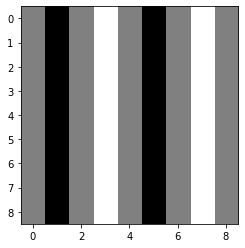

In [283]:
image0 = numpy.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=numpy.uint8)
imshow(image0, cmap='gray')

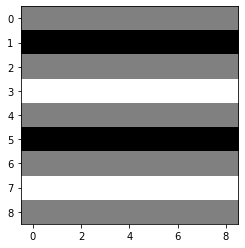

In [284]:
image1 = numpy.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=numpy.uint8)
imshow(image1, cmap='gray')

In [285]:
images = []
for image in [image0, image1]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(numpy.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. 

In [286]:
model0.predict(numpy.array(images))

array([[[[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]]],


       [[[    0.],
         [    0.],
         [    0

## Model 1 Questions

1. The convolutional filter has 7 horizontal and 7 vertical positions. 


2. In the second image we get the highest absolute values in the filter outputs. This is because the filter is made up of a row of positive 1s and two rows of negative 1s. The lines in the second image are horizontal, and thus match the filter. As the filter slides horizontally, the same value gets repeated. 

## Second Model

In [287]:
model1 = Sequential()
model1.add(Conv2D(filters=2,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(image_size, image_size, 1)))
model1.add(Conv2D(filters=1, kernel_size=kernel_size))

With a different model structure, we will have a different number of weights to fit.

In [288]:
model1_weights = model1.get_weights()
print(model1_weights)

[array([[[[ 0.15868661, -0.37636608]],

        [[ 0.44164178,  0.3981326 ]],

        [[-0.24646173,  0.3620831 ]]],


       [[[-0.42902324,  0.28736272]],

        [[-0.315747  ,  0.00825572]],

        [[-0.42280257, -0.2495652 ]]],


       [[[ 0.19445476, -0.09638208]],

        [[ 0.3748953 , -0.16160688]],

        [[-0.09959885,  0.04070923]]]], dtype=float32), array([0., 0.], dtype=float32), array([[[[-0.3428455 ],
         [-0.35647357]],

        [[-0.23370922],
         [-0.02665052]],

        [[-0.33132526],
         [-0.32488692]]],


       [[[ 0.18514404],
         [-0.34238088]],

        [[-0.00549191],
         [-0.30199397]],

        [[-0.35708877],
         [ 0.4055324 ]]],


       [[[-0.2588147 ],
         [-0.07714233]],

        [[ 0.43629697],
         [-0.00098589]],

        [[-0.4049378 ],
         [-0.04214561]]]], dtype=float32), array([0.], dtype=float32)]


In [289]:
layer_num = 0
filter_num = 0
# Create diagonal of pos 1 from top left to bottom right and fill everything else neg 1.
for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            model1_weights[layer_num][y][x][0][filter_num] = 1
        else:
            model1_weights[layer_num][y][x][0][filter_num] = -1

# Create diagonal of pos 1 from top right to bottom left and fill everything else neg 1.
filter_num = 1
for y in range(kernel_size):
    for x in range(kernel_size):
        if kernel_size - 1 - y == x:
            model1_weights[layer_num][y][x][0][filter_num] = 1
        else:
            model1_weights[layer_num][y][x][0][filter_num] = -1

In [290]:
# layer 1 is for setting the biases of the first layer.
# They are zero by default, so leave them that way and
# move on to layer 2, which contains the weights for the
# filters of the second layer.
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0 # because there are two input filters from the first layer
        # create a similar top left to bottom right diagonal, just -0.25 instead of -1
        if y == x:
            model1_weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            model1_weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
        input_filter_num = 1
        # create a similar top right to bottom left diagonal, just -0.25 instead of -1
        if kernel_size - 1 - y == x:
            model1_weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            model1_weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
print(model1_weights)

[array([[[[ 1., -1.]],

        [[-1., -1.]],

        [[-1.,  1.]]],


       [[[-1., -1.]],

        [[ 1.,  1.]],

        [[-1., -1.]]],


       [[[-1.,  1.]],

        [[-1., -1.]],

        [[ 1., -1.]]]], dtype=float32), array([0., 0.], dtype=float32), array([[[[ 1.  ],
         [-0.25]],

        [[-0.25],
         [-0.25]],

        [[-0.25],
         [ 1.  ]]],


       [[[-0.25],
         [-0.25]],

        [[ 1.  ],
         [ 1.  ]],

        [[-0.25],
         [-0.25]]],


       [[[-0.25],
         [ 1.  ]],

        [[-0.25],
         [-0.25]],

        [[ 1.  ],
         [-0.25]]]], dtype=float32), array([0.], dtype=float32)]


And save the weights back into the model.

In [291]:
model1.set_weights(model1_weights)

In [292]:
def predict_images(images, model=model1):
    resized_images = []
    for image in images:
        resized_images.append(numpy.resize(image, (image_size, image_size, 1)))
    return model.predict(numpy.array(resized_images))

In [293]:
predict_images([image0, image1])

array([[[[-1150.]]],


       [[[-1150.]]]], dtype=float32)

## Exercise #1
Create some images that do get positive ouputs from this model.

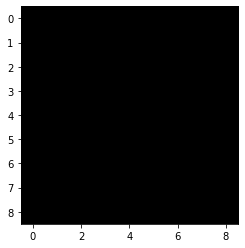

In [294]:
image_black = numpy.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=numpy.uint8)
imshow(image_black, cmap='gray', vmin=0, vmax=255)

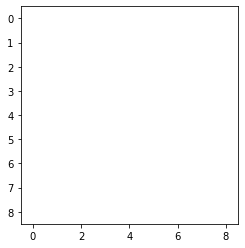

In [295]:
image_white = numpy.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype=numpy.uint8)
imshow(image_white, cmap='gray', vmin=0, vmax=255)

In [296]:
predict_images([image_black, image_white])

array([[[[    0.]]],


       [[[-2295.]]]], dtype=float32)

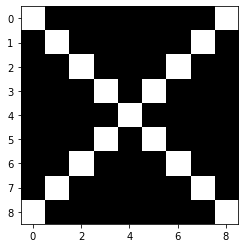

In [297]:
image_cross = numpy.array([
    [255, 0, 0, 0, 0, 0, 0, 0, 255],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [0, 0, 255, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 255, 0, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 255, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 255, 0, 0],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [255, 0, 0, 0, 0, 0, 0, 0, 255],
], dtype=numpy.uint8)

imshow(image_cross, cmap='gray', vmin=0, vmax=255)

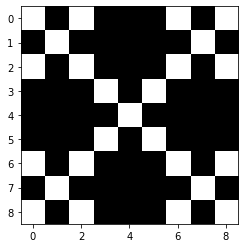

In [298]:
image_crosses = numpy.array([
    [255, 0, 255, 0, 0, 0, 255, 0, 255],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [255, 0, 255, 0, 0, 0, 255, 0, 255],
    [0, 0, 0, 255, 0, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 255, 0, 0, 0],
    [255, 0, 255, 0, 0, 0, 255, 0, 255],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [255, 0, 255, 0, 0, 0, 255, 0, 255],
], dtype=numpy.uint8)

imshow(image_crosses, cmap='gray', vmin=0, vmax=255)

In [299]:
predict_images([image_cross, image_crosses])

array([[[[3825.]]],


       [[[1275.]]]], dtype=float32)

## Exercise #2

Add additional filters to the model or create a new model with your own filters. Create images that get positive weights for different patterns of filters.

In [300]:
# with this model I set out to make a model that would get a higher result for the my image "image_crosses" than "image_cross", but still get a positive result for both
model2 = Sequential()
model2.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(image_size, image_size, 1)))
model2.add(Conv2D(filters=1, kernel_size=kernel_size))

In [301]:
model2_weights = model2.get_weights()

In [302]:
layer_num = 0
filter_num = 0
# both filters are an X of 1's with the rest being 0's
for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            model2_weights[0][y][x][0][filter_num] = 1
            model2_weights[2][y][x][0][filter_num] = 1
        elif kernel_size - 1 - y == x:
            model2_weights[0][y][x][0][filter_num] = 1
            model2_weights[2][y][x][0][filter_num] = 1
        else:
            model2_weights[0][y][x][0][filter_num] = 0
            model2_weights[2][y][x][0][filter_num] = 0

model2.set_weights(model2_weights)
print(model2_weights)

[array([[[[1.]],

        [[0.]],

        [[1.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[1.]],

        [[0.]],

        [[1.]]]], dtype=float32), array([0.], dtype=float32), array([[[[1.]],

        [[0.]],

        [[1.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[1.]],

        [[0.]],

        [[1.]]]], dtype=float32), array([0.], dtype=float32)]


In [303]:
predict_images([image_cross, image_crosses], model2)

array([[[[4335.]]],


       [[[6375.]]]], dtype=float32)

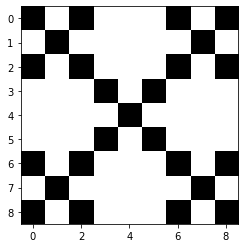

In [304]:
image_crosses_inversed = image_crosses

# https://numpy.org/doc/stable/reference/arrays.nditer.html
with numpy.nditer(image_crosses_inversed, op_flags=['readwrite']) as it:
   for pixel in it:
        if pixel == 255:
           pixel[...] = 0
        else:
            pixel[...] = 255

imshow(image_crosses_inversed, cmap='gray', vmin=0, vmax=255)

In [305]:
predict_images([image_crosses_inversed], model2)

array([[[[0.]]]], dtype=float32)